In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
def cargar_datos(archivo):

    # Cargar datos desde CSV
    df = pd.read_csv(archivo, index_col=0)
    return df


In [8]:
def variables_categoricas(df):
   
    # Identificar columnas categóricas con valores nulos
    nulos_categoricas = df[df.columns[df.isnull().any()]].select_dtypes(include="O").columns
    print("Las columnas categóricas que tienen nulos son : \n")
    print(nulos_categoricas)

    # Mostrar los valores de cada columna categórica con nulos
    for col in nulos_categoricas:
        print(f"La distribución de las categorías para la columna {col.upper()}")
        display(df[col].value_counts() / df.shape[0])
        print("........................")

    # Listas de columnas para reemplazar por la moda y por "Unknown"
    columnas_moda = ['OverTime', 'Department', 'PerformanceRating', 'WorkLifeBalance', 'StockOptionLevel']
    columnas_desconocido = ['BusinessTravel', 'EmployeeNumber' , 'MaritalStatus']

    # Reemplazar nulos con la moda 
    for columna in columnas_moda:
        moda = df[columna].mode()[0]  
        df[columna] = df[columna].fillna(moda)  

    # Reemplazar nulos con "Unknown" 
    for columna in columnas_desconocido:
        df[columna] = df[columna].fillna("Unknown")

    # Verificar si se han eliminado los nulos
    print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
    print(df[columnas_moda + columnas_desconocido].isnull().sum())

    return df


In [9]:
def variables_numericas(df):
   
    # Identificar columnas numéricas con valores nulos
    nulos_numericas = df[df.columns[df.isnull().any()]].select_dtypes(include=np.number).columns
    print("Las columnas numéricas que tienen nulos son : \n")
    print(nulos_numericas)

    # Mostrar el porcentaje de valores nulos 
    print(df[nulos_numericas].isnull().sum() / df.shape[0] * 100)

    # Visualización de valores atípicos en columnas numéricas
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
    axes = axes.flat
    for indice, col in enumerate(nulos_numericas):
        sns.boxplot(x=col, data=df, ax=axes[indice])
    plt.tight_layout()
    fig.delaxes(axes[-1])

    # Reemplazar nulos con la media 
    media_conspriceidx = df[["DailyRate", "HourlyRate"]].mean()
    df[["DailyRate", "HourlyRate"]] = df[["DailyRate", "HourlyRate"]].fillna(media_conspriceidx)

    # Verificar si se han eliminado los nulos 
    print(f"Después del 'fillna' tenemos {df[['DailyRate', 'HourlyRate']].isnull().sum()} nulos")

    # Copiar el DataFrame 
    df_copia = df.copy()

    # Configurar y aplicar IterativeImputer 
    imputer_iterative = IterativeImputer(max_iter=20, random_state=42)
    imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[[ "MonthlyIncome", "StandardHours", "TotalWorkingYears"]])

    # Asignar los valores imputados de nuevo al DataFrame
    df_copia[["EmployeeNumber", "MonthlyIncome", "StandardHours", "TotalWorkingYears"]] = imputer_iterative_imputado

    # Verificar si se han eliminado los nulos 
    print(f"Después del 'Iterative' tenemos: \n{df_copia[['EmployeeNumber', 'MonthlyIncome', 'StandardHours','TotalWorkingYears']].isnull().sum()} nulos")

    # Describir las estadísticas del DataFrame imputado
    print(df_copia.describe()[['EmployeeNumber', 'MonthlyIncome', 'StandardHours','TotalWorkingYears']])

    # Guardar el DataFrame en un archivo CSV
    df_copia.to_csv("hr_raw_data_nonulls.csv", index=False)

    return df_copia


Las columnas categóricas que tienen nulos son : 

Index(['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus',
       'OverTime', 'PerformanceRating', 'StockOptionLevel', 'WorkLifeBalance',
       'RoleDepartament'],
      dtype='object')
La distribución de las categorías para la columna BUSINESSTRAVEL


BusinessTravel
Travel Rarely        0.363073
Travel Frequently    0.102230
Non Travel           0.056382
Name: count, dtype: float64

........................
La distribución de las categorías para la columna DEPARTMENT


Department
Research & Development     0.121437
Sales                      0.056382
Human Resources            0.009294
Name: count, dtype: float64

........................
La distribución de las categorías para la columna EDUCATIONFIELD


EducationField
Life Sciences       0.216233
Medical             0.171004
Marketing           0.064436
Technical Degree    0.042751
Other               0.036555
Human Resources     0.007435
Name: count, dtype: float64

........................
La distribución de las categorías para la columna MARITALSTATUS


MaritalStatus
Married     0.271995
Single      0.201363
Divorced    0.123296
Name: count, dtype: float64

........................
La distribución de las categorías para la columna OVERTIME


OverTime
No     0.422553
Yes    0.158612
Name: count, dtype: float64

........................
La distribución de las categorías para la columna PERFORMANCERATING


PerformanceRating
3,0    0.746592
4,0    0.132590
Name: count, dtype: float64

........................
La distribución de las categorías para la columna STOCKOPTIONLEVEL


StockOptionLevel
Low       0.412639
Medium    0.106568
High      0.055143
Name: count, dtype: float64

........................
La distribución de las categorías para la columna WORKLIFEBALANCE


WorkLifeBalance
3,0    0.565675
2,0    0.222429
4,0    0.096035
1,0    0.048947
Name: count, dtype: float64

........................
La distribución de las categorías para la columna ROLEDEPARTAMENT


RoleDepartament
Sales Executive     Sales                                0.042751
Research Scientist     Research & Development            0.038414
Laboratory Technician     Research & Development         0.034696
Healthcare Representative     Research & Development     0.016109
Manufacturing Director     Research & Development        0.013631
Sales Representative     Sales                           0.010533
Research Director     Research & Development             0.009913
Manager     Research & Development                       0.008674
Human Resources     Human Resources                      0.008674
Manager     Sales                                        0.003098
Manager     Human Resources                              0.000620
Name: count, dtype: float64

........................
Después del reemplazo usando 'fillna' quedan los siguientes nulos
BusinessTravel       0
OverTime             0
PerformanceRating    0
WorkLifeBalance      0
StockOptionLevel     0
Department           0
EducationField       0
MaritalStatus        0
RoleDepartament      0
dtype: int64
Las columnas numéricas que tienen nulos son : 

Index(['DailyRate', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome',
       'StandardHours', 'TotalWorkingYears'],
      dtype='object')
DailyRate             7.682776
EmployeeNumber       26.703841
HourlyRate            5.204461
MonthlyIncome        52.230483
StandardHours        74.039653
TotalWorkingYears    32.589839
dtype: float64
Después del 'fillna' tenemos DailyRate     0
HourlyRate    0
dtype: int64 nulos
Después del 'Iterative' tenemos: 
EmployeeNumber       0
MonthlyIncome        0
StandardHours        0
TotalWorkingYears    0
dtype: int64 nulos
       EmployeeNumber  MonthlyIncome  StandardHours  TotalWorkingYears
count  

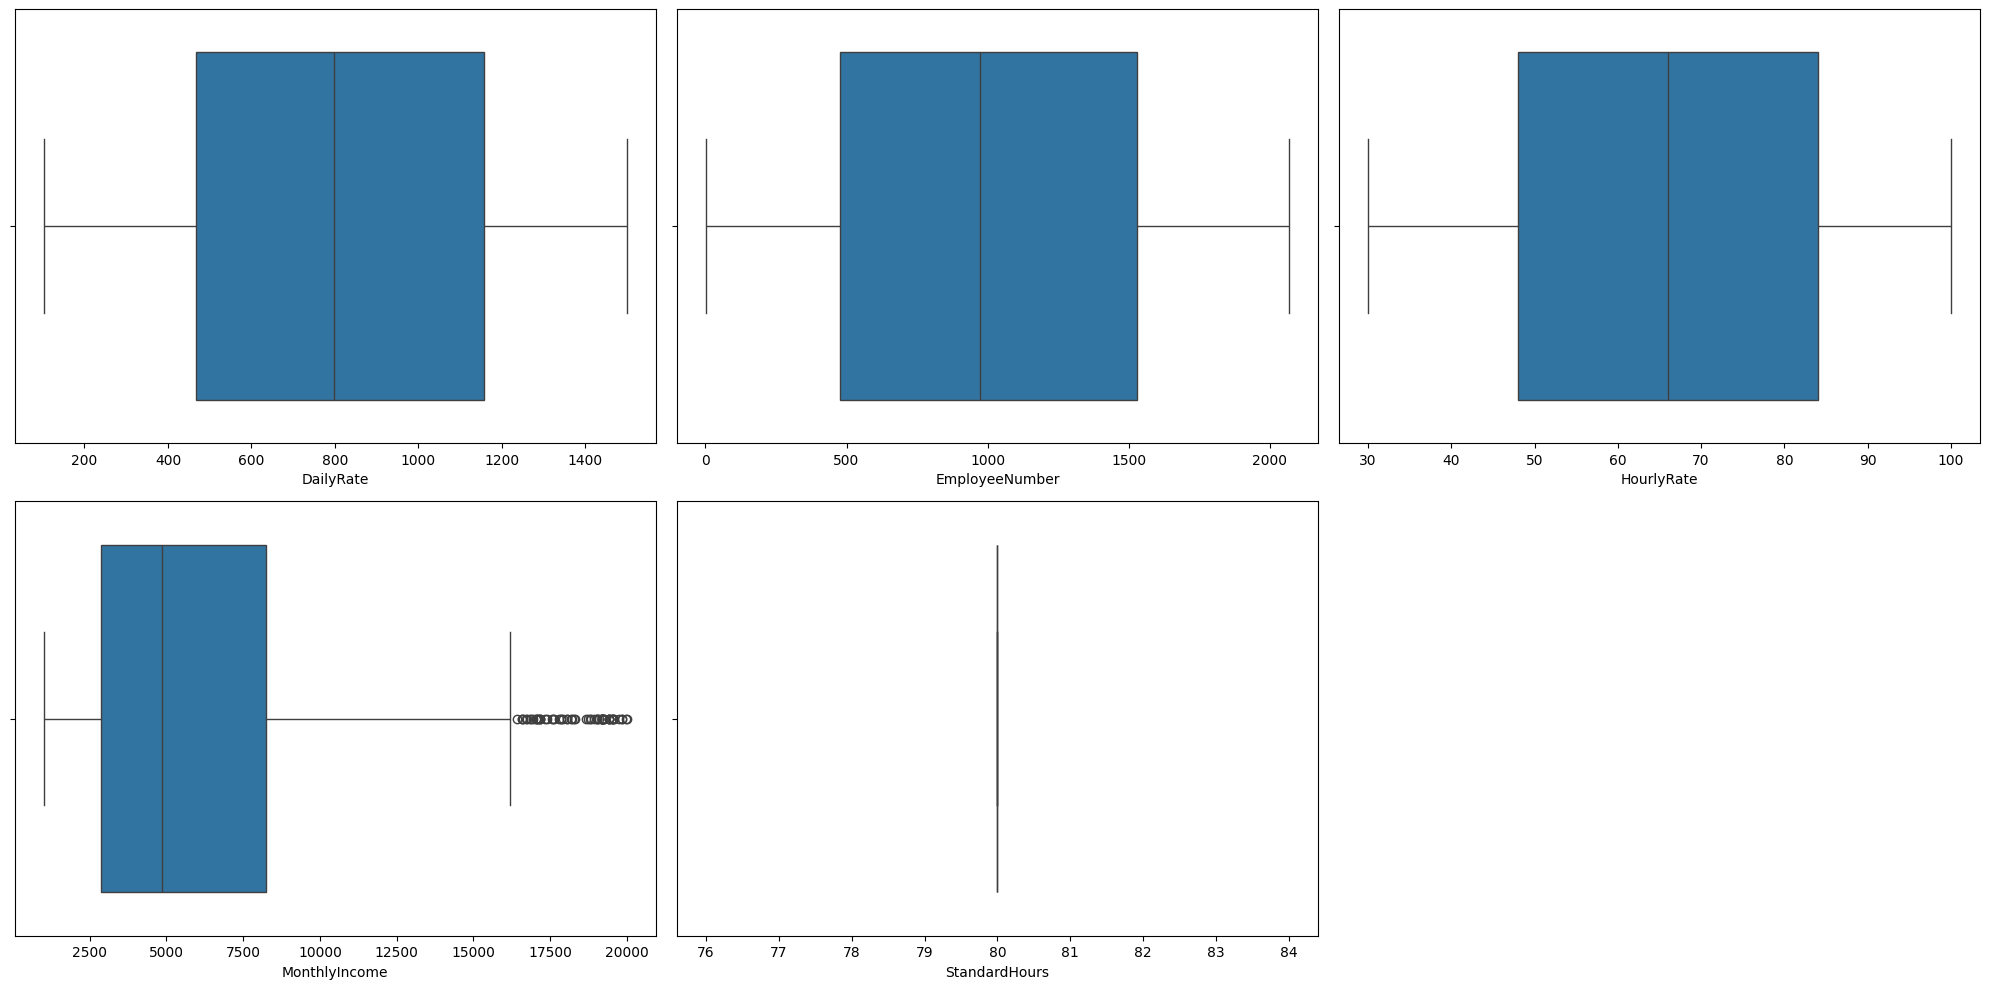

In [10]:
# Ruta del archivo CSV
archivo = "hr_raw_data_limpio_.csv"

# Cargar los datos desde el archivo CSV
df = cargar_datos(archivo)

# Imputar valores nulos en variables categóricas
df = variables_categoricas(df)

# Imputar valores nulos en variables numéricas
df = variables_numericas(df)
